In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [79]:
train_data = pd.read_csv('data/diabetes.csv')

In [83]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
train_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пустых значений нет, постоим гистограммы частот всех фич

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

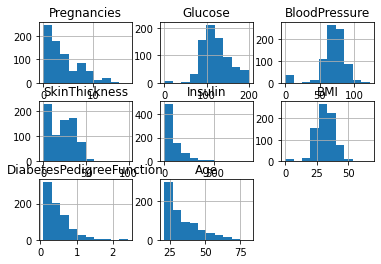

In [86]:
train_data.drop(columns=['Outcome'], axis=1).hist()

Заметим наличие нулевых значений в некоторых фичах в которых их не должно быть. Проверим колличество таких нулевых значений

In [87]:
features = list(train_data)
print('Count of missed values\n')
for it in features[1:-1]:
    print(it,':', train_data[it].loc[train_data[it] == 0].count())

Count of missed values

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [88]:
train_data.Outcome.count()

768

Все значения, кроме Pregnancies (колличества беременностей), не может быть нулевым, значит в таблице имеются пропущенные значения, причем колличество пропущенных значений в случае инсулина и толщины кожи достаточно велико относительно общего числа значений в таблице. Заменим пропущенные значения на среднее в каждой из колон.

In [89]:
mode_values = train_data.mean()[1:-1]
for it in features[1:-1]:
    train_data[it] = train_data[it].replace(0, mode_values[it])

In [90]:
print('Count of missed values\n')
for it in features[1:-1]:
    print(it,':', train_data[it].loc[train_data[it] == 0].count())

Count of missed values

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0


Проверим корреляцию между вичами и результатом

In [91]:
train_data.corr().Outcome

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Заметим, что корреляция между толщиной кожи и резульататом, а также инсулином и результатом, значима но при этом достаточно небольшая. Учитывая, что большая часть значений выбранна как среднее, эти колонны не имеют достаточной информативности и можно их не учитывать при обучении модели.

In [92]:
X = train_data.drop(columns=['Outcome', 'Insulin', 'SkinThickness'], axis=1)

In [93]:
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33


In [94]:
y = train_data.Outcome

In [95]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [96]:
list(X)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

<AxesSubplot:>

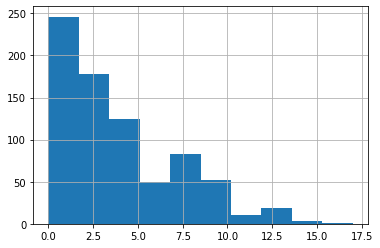

In [97]:
X.Pregnancies.hist()

<AxesSubplot:>

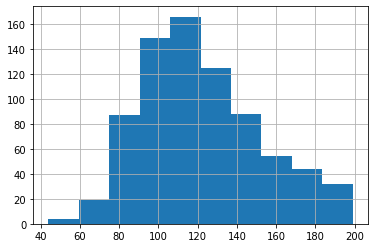

In [98]:
X.Glucose.hist()

<AxesSubplot:>

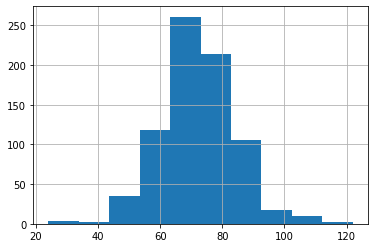

In [99]:
X.BloodPressure.hist()

<AxesSubplot:>

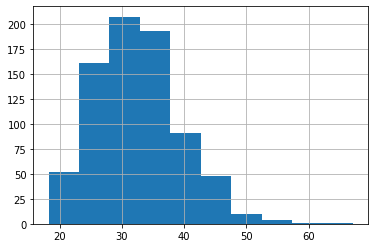

In [100]:
X.BMI.hist()

<AxesSubplot:>

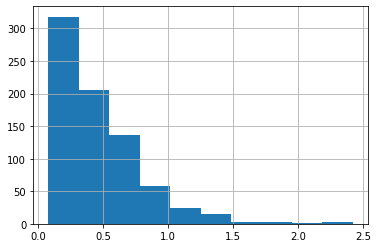

In [101]:
X.DiabetesPedigreeFunction.hist()

<AxesSubplot:>

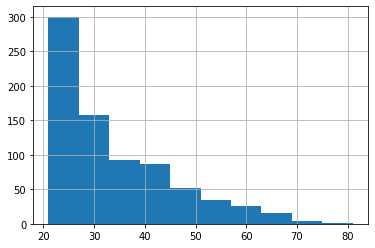

In [102]:
X.Age.hist()

<AxesSubplot:>

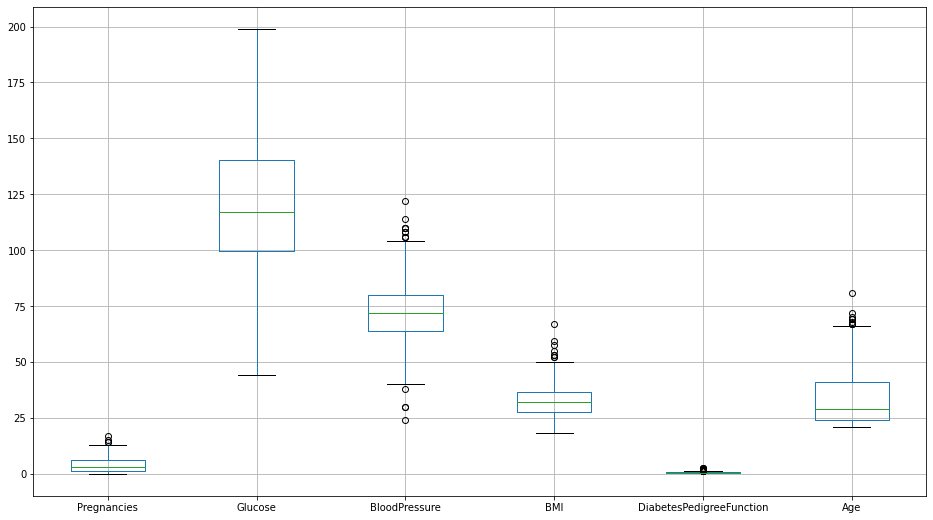

In [103]:
plt.figure(figsize=(16, 9))
X.boxplot()

In [104]:
def find_borders(arr):
    first_quart = np.quantile(arr, 0.25)
    third_quart = np.quantile(arr, 0.75)
    distance = third_quart - first_quart
    min_border = first_quart - 1.5*distance
    max_border = third_quart + 1.5*distance
    return min_border, max_border

In [105]:
min_max = X.apply(find_borders)
min_max

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,-6.5,39.0,40.0,13.85,-0.33,-1.5
1,13.5,201.0,104.0,50.25,1.20,66.5


In [108]:
min_border = min_max.iloc[0]
max_border = min_max.iloc[1]
print(min_border,'\n\n', max_border)

Pregnancies                 -6.50
Glucose                     39.00
BloodPressure               40.00
BMI                         13.85
DiabetesPedigreeFunction    -0.33
Age                         -1.50
Name: 0, dtype: float64 

 Pregnancies                  13.50
Glucose                     201.00
BloodPressure               104.00
BMI                          50.25
DiabetesPedigreeFunction      1.20
Age                          66.50
Name: 1, dtype: float64


In [129]:
features = list(X)
mask = X.Pregnancies == X.Pregnancies
for it in features:
    mask = mask & ((X[it] >= min_border[it]) & (X[it] <= max_border[it]))
mask[:10]

0     True
1     True
2     True
3     True
5     True
6     True
7     True
8     True
9     True
10    True
dtype: bool

In [130]:
X = X.loc[mask]

<AxesSubplot:>

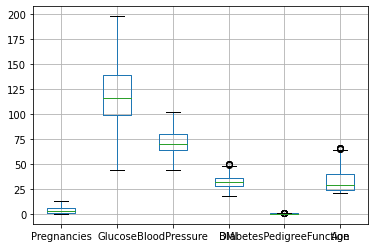

In [131]:
X.boxplot()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [23]:
rf_clf = RandomForestClassifier()

In [126]:
params = {'n_estimators':range(1,100,10),
          'max_depth':range(2,15,2),
          'min_samples_leaf':range(2,30,5),
          'min_samples_split':range(2,30,5),
          "criterion":['gini', 'entropy']}

In [127]:
grid_search_cv = RandomizedSearchCV(rf_clf, params, cv=5)

In [128]:
grid_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15, 2),
                                        'min_samples_leaf': range(2, 30, 5),
                                        'min_samples_split': range(2, 30, 5),
                                        'n_estimators': range(1, 100, 10)})

In [129]:
best_clf = grid_search_cv.best_estimator_

In [130]:
best_clf.score(X_test, y_test)

0.796875

In [131]:
from sklearn.metrics import precision_score, recall_score

In [132]:
prediction_proba = best_clf.predict_proba(X_test)

(array([30., 25., 24., 21., 22., 17., 17., 10., 15., 11.]),
 array([0.0024171 , 0.084799  , 0.16718091, 0.24956281, 0.33194472,
        0.41432662, 0.49670853, 0.57909044, 0.66147234, 0.74385425,
        0.82623615]),
 <BarContainer object of 10 artists>)

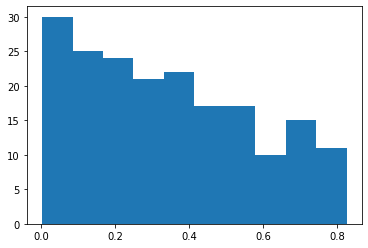

In [133]:
plt.hist(prediction_proba[:, 1])

In [134]:
prediction = best_clf.predict(X_test)

In [135]:
def calc_metrics(prediction):
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1_metric = 2*precision*recall / (precision + recall)
    print('precision:',precision,'\n','recall:',recall, '\n', 'F1:', f1_metric)

In [136]:
calc_metrics(prediction)

precision: 0.7169811320754716 
 recall: 0.6129032258064516 
 F1: 0.6608695652173913


В задании необходимо определить болен ли человек диабетом, то есть в нашем случае стоит оптимизировать метрику recall, так как лучше если не выявить заболевание опаснее чем выявить его ошибочно

In [149]:
prediction = np.where(prediction_proba[:,1] > 0.35, 1, 0)

In [150]:
calc_metrics(prediction)

precision: 0.5666666666666667 
 recall: 0.8225806451612904 
 F1: 0.6710526315789475


Оптимизируя метрику recall, так же удалось улучшить значение f1 метрики